In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
class SLP(object):

    def __init__(self, eta=0.05, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        self.errors = []
        self.errors_ = []
        self.perceptrons = []
        for i in range(len(X)):
            sum = 0
            tmp = Perceptron(alpha=0.05, max_iter=10, random_state=1)
            self.perceptrons.append(tmp)
            self.perceptrons[i].fit(X,y[i])
            self.errors_.append(self.perceptrons[i].score(X,y[i]))
        return self

    def predict(self, X):
        for i in range(len(X)):
            self.perceptrons[i].predict(X)
            print(self.perceptrons[i].predict(X))
        return self

    def misclassified(self, X, y):
        counter = 0
        y = np.array(y)
        for i in range(len(X)):
            tmp = np.array(self.perceptrons[i].predict(X))
            for j in range(len(y[0])):
                if tmp[j] != y[i][j]:
                    counter = counter + 1
        return counter

    def show(self, X):
        fig, ax = plt.subplots(nrows=1, ncols=X.shape[0], sharex=True, sharey=True)

        ax = ax.flatten()

        for i in range(X.shape[0]):
            img = X[i].reshape(7,5)
            ax[i].imshow(img,cmap='Greys')
        return None

In [3]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['letters.data']),header=None)
my_letters = [2,3,5,8,10,11,12,16,23,25]
X = df.iloc[my_letters,:35].values

Saving letters.data to letters.data


In [4]:
y = [[1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
     [-1,1,-1,-1,-1,-1,-1,-1,-1,-1],
     [-1,-1,1,-1,-1,-1,-1,-1,-1,-1],
     [-1,-1,-1,1,-1,-1,-1,-1,-1,-1],
     [-1,-1,-1,-1,1,-1,-1,-1,-1,-1],
     [-1,-1,-1,-1,-1,1,-1,-1,-1,-1],
     [-1,-1,-1,-1,-1,-1,1,-1,-1,-1],
     [-1,-1,-1,-1,-1,-1,-1,1,-1,-1],
     [-1,-1,-1,-1,-1,-1,-1,-1,1,-1],
     [-1,-1,-1,-1,-1,-1,-1,-1,-1,1],]

[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1  1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1  1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1  1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1  1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1  1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

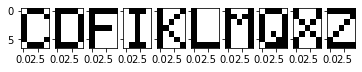

In [5]:
net = SLP()
net.show(X)
net.fit(X,y)
net.predict(X)
net.errors_

In [6]:
def damage(X,percent,seed=1):
    rgen = np.random.RandomState(seed)
    result = np.array(X)
    count = int(X.shape[1]*percent/100)

    for indeks_example in range(len(X)):
        order = np.sort( rgen.choice(X.shape[1], count, replace = False))
        for indeks_pixel in order:
            result[indeks_example][indeks_pixel]*=-1
    return result

In [7]:
X_5 = damage(X,5)
X_15 = damage(X,15)
X_40 = damage(X,40)

[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1  1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1  1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1  1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1  1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1  1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1]


1

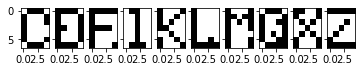

In [8]:
net.show(X_5)
net.predict(X_5)
net.misclassified(X_5,y)

[ 1  1 -1 -1 -1 -1 -1 -1  1 -1]
[-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1  1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1  1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1  1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1  1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1]


4

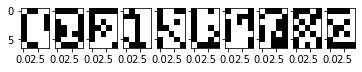

In [9]:
net.show(X_15)
net.predict(X_15)
net.misclassified(X_15,y)

[-1 -1 -1 -1 -1 -1 -1 -1  1  1]
[-1 -1 -1  1 -1 -1  1  1  1 -1]
[-1  1 -1 -1  1 -1 -1 -1 -1 -1]
[-1 -1 -1  1 -1  1  1  1 -1 -1]
[-1  1  1  1  1  1 -1  1 -1  1]
[-1  1 -1  1 -1  1  1 -1 -1  1]
[-1 -1 -1  1 -1 -1  1  1 -1  1]
[ 1 -1 -1  1  1  1  1  1 -1  1]
[-1 -1 -1  1 -1 -1  1  1 -1  1]
[-1 -1 -1  1 -1 -1 -1 -1  1  1]


40

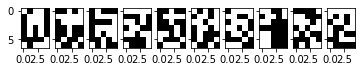

In [10]:
net.show(X_40)
net.predict(X_40)
net.misclassified(X_40,y)